# Exploratory Notebook

In [28]:
import pandas as pd
import sqlite3
import matplotlib as plt

conn = sqlite3.connect('../Data/im.db')



In [29]:
df_mb = pd.read_sql("""

SELECT *
FROM movie_basics







""", conn)

In [30]:
df_mb.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [31]:
df_mb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [32]:
df_mb['genres'].isna().sum()

5408

In [33]:
columns_to_drop_na = ['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres']
df_mb.dropna(subset=columns_to_drop_na, inplace=True)


In [34]:
df_mb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112232 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         112232 non-null  object 
 1   primary_title    112232 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112232 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genres           112232 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


In [35]:
df_mb['genres'].isna().sum()

0

In [36]:
df_mr = pd.read_sql("""

SELECT *
FROM movie_ratings







""", conn)

In [37]:
df_mr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [38]:
df_mr.columns

Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')

In [39]:
columns_to_drop_na = ['movie_id', 'averagerating', 'numvotes']
df_mr.dropna(subset=columns_to_drop_na, inplace=True)
df_mr.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [40]:
df_mr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.3+ MB


In [41]:
df_ma = pd.read_sql("""

SELECT *
FROM movie_akas


""", conn)

In [42]:
df_ma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [43]:
df_ma.columns

Index(['movie_id', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'is_original_title'],
      dtype='object')

In [44]:
#columns_to_drop_na = ['movie_id', 'ordering', 'title', 'region', 'language', 'types',
#       'attributes', 'is_original_title']
#df_ma.dropna(subset=columns_to_drop_na, inplace=True)

In [45]:
df_ma.isna().sum()


movie_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

In [46]:
df_5a = pd.read_sql("""

SELECT movie_id, primary_title, genres, MAX (averagerating) AS av_rating , MAX(numvotes) AS num_votes
FROM movie_basics
    JOIN movie_ratings 
       USING(movie_id)
        GROUP BY movie_id
        ORDER BY num_votes DESC;



""", conn)

In [47]:
df_5a.head(10)

,movie_id,primary_title,genres,av_rating,num_votes
0,tt1375666,Inception,"Action,Adventure,Sci-Fi",8.8,1841066
1,tt1345836,The Dark Knight Rises,"Action,Thriller",8.4,1387769
2,tt0816692,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1299334
3,tt1853728,Django Unchained,"Drama,Western",8.4,1211405
4,tt0848228,The Avengers,"Action,Adventure,Sci-Fi",8.1,1183655
5,tt0993846,The Wolf of Wall Street,"Biography,Crime,Drama",8.2,1035358
6,tt1130884,Shutter Island,"Mystery,Thriller",8.1,1005960
7,tt2015381,Guardians of the Galaxy,"Action,Adventure,Comedy",8.1,948394
8,tt1431045,Deadpool,"Action,Adventure,Comedy",8.0,820847
9,tt1392170,The Hunger Games,"Action,Adventure,Sci-Fi",7.2,795227


In [48]:
df_5a['genres'] = df_5a['genres'].str.split(',') 


In [49]:
df_5a = df_5a[df_5a['genres'].notnull()]

In [50]:
df_5a = df_5a.explode('genres')

In [51]:
#df_5a = df_5a.drop_duplicates(subset=['primary_title'])

In [52]:
df_5a.to_sql('cleaned_movies', conn, if_exists='replace')

In [53]:
df_5a.head(20)

,movie_id,primary_title,genres,av_rating,num_votes
0,tt1375666,Inception,Action,8.8,1841066
0,tt1375666,Inception,Adventure,8.8,1841066
0,tt1375666,Inception,Sci-Fi,8.8,1841066
1,tt1345836,The Dark Knight Rises,Action,8.4,1387769
1,tt1345836,The Dark Knight Rises,Thriller,8.4,1387769
2,tt0816692,Interstellar,Adventure,8.6,1299334
2,tt0816692,Interstellar,Drama,8.6,1299334
2,tt0816692,Interstellar,Sci-Fi,8.6,1299334
3,tt1853728,Django Unchained,Drama,8.4,1211405
3,tt1853728,Django Unchained,Western,8.4,1211405


In [54]:
#fig, axs = plt.subplots(1, 3, figsize=(10, 18)) 
plt.figure(figsize=(10, 6))
                        
plt.bar(df_5a['genres'], df_5a['num_votes'], color='blue')
plt.xlabel('Genres')
plt.ylabel('Num_votes')
plt.title('TGenres vs Num_votes')
plt.tick_params (axis="x", labelrotation=90)                       
plt.show()

AttributeError: module 'matplotlib' has no attribute 'figure'

In [55]:
#df_5a.to_csv('movie_numvotes.csv')

In [56]:


df_5b = pd.read_sql("""

SELECT movie_id, primary_title, genres, MAX (averagerating) AS av_rating , MAX(numvotes) AS num_votes
FROM movie_basics
    JOIN movie_ratings 
       USING(movie_id)
        GROUP BY movie_id
        ORDER BY av_rating DESC;



""", conn)

In [57]:
df_5b.head(20)

,movie_id,primary_title,genres,av_rating,num_votes
0,tt9715646,Renegade,Documentary,10.0,20
1,tt8730716,Pick It Up! - Ska in the '90s,Documentary,10.0,5
2,tt7259300,Calamity Kevin,"Adventure,Comedy",10.0,6
3,tt7227500,Ellis Island: The Making of a Master Race in A...,"Documentary,History",10.0,6
4,tt6991826,A Dedicated Life: Phoebe Brand Beyond the Group,Documentary,10.0,5
5,tt6295832,Requiem voor een Boom,Documentary,10.0,5
6,tt5390098,The Paternal Bond: Barbary Macaques,Documentary,10.0,5
7,tt5344358,All Around Us,Documentary,10.0,6
8,tt5089804,Fly High: Story of the Disc Dog,Documentary,10.0,7
9,tt4960818,Revolution Food,Documentary,10.0,8


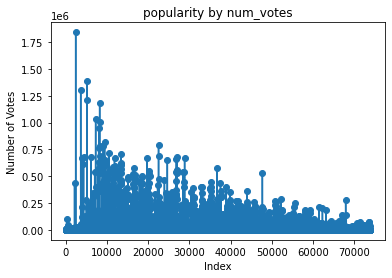

In [58]:
import matplotlib.pyplot as plt


# Plot the 'num_votes' column
plt.plot(df_5b['num_votes'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Number of Votes')
plt.title('popularity by num_votes')

# Show the plot
plt.show()


In [59]:
df_5['genres'].values

NameError: name 'df_5' is not defined

NameError: name 'df_5' is not defined

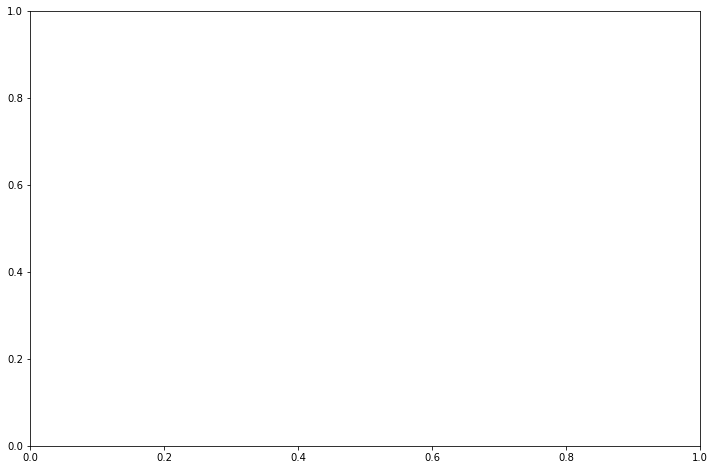

In [60]:

# bar chart 
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(df_5['genres'].values, df_5['num_votes'])
ax.set_ylabel('Number of Movies')
ax.set_title('Popularity of movies by Genre')
ax.set_xticklabels(df_5['genres'].index, rotation=45, ha='right')

# show plot
plt.show()

In [61]:
df_mg = pd.read_csv('../Data/bom.movie_gross.csv.gz')

In [62]:
df_mg

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [63]:
df_mg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [64]:
df_mg.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [65]:
df_mg.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [66]:
columns_to_drop_na = ['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']
df_mg.dropna(subset=columns_to_drop_na, inplace=True)
df_mg.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [67]:
df_mg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [68]:
df_mg

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [69]:
df_mg['domestic_gross'] = pd.to_numeric(df_mg['domestic_gross'], errors='coerce').fillna(0).astype(int)
df_mg['foreign_gross'] = pd.to_numeric(df_mg['foreign_gross'], errors='coerce').fillna(0).astype(int)

In [70]:
df_mg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           2007 non-null   object
 1   studio          2007 non-null   object
 2   domestic_gross  2007 non-null   int64 
 3   foreign_gross   2007 non-null   int64 
 4   year            2007 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 94.1+ KB


In [71]:
df_mg['total_gross'] = df_mg['domestic_gross'] + df_mg['foreign_gross']

In [72]:
df_gross= df_mg.head(20)

In [73]:
df_gross

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000,652000000,2010,1067000000
1,Alice in Wonderland (2010),BV,334200000,691300000,2010,1025500000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010,960300000
3,Inception,WB,292600000,535700000,2010,828300000
4,Shrek Forever After,P/DW,238700000,513900000,2010,752600000
5,The Twilight Saga: Eclipse,Sum.,300500000,398000000,2010,698500000
6,Iron Man 2,Par.,312400000,311500000,2010,623900000
7,Tangled,BV,200800000,391000000,2010,591800000
8,Despicable Me,Uni.,251500000,291600000,2010,543100000
9,How to Train Your Dragon,P/DW,217600000,277300000,2010,494900000


In [74]:
#df_gross.to_csv('movie_gross.csv')

In [75]:
df_rt = pd.read_csv('../Data/rt.reviews.tsv.gz', sep='\t', encoding='latin-1')

In [76]:
df_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [77]:
df_rt

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [78]:
df_rt.columns

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

In [79]:
columns_to_drop_na = ['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date']
df_rt.dropna(subset=columns_to_drop_na, inplace=True)


In [80]:
df_rt.shape

(33988, 8)

In [81]:
df_rt['top_critic'].max()

1

In [82]:
df_rt = df_rt[df_rt['top_critic'] >= 1]

In [83]:
df_rt

,id,review,rating,fresh,critic,top_critic,publisher,date
24,3,"The rapid dialogue is dry and mannered, like a...",2.5/4,rotten,Joe Williams,1,St. Louis Post-Dispatch,"September 6, 2012"
47,3,It feels like each and every moment bursts for...,2/4,rotten,Stephanie Merry,1,Washington Post,"August 24, 2012"
50,3,"There's not really a movie there, nothing that...",2/4,rotten,Mick LaSalle,1,San Francisco Chronicle,"August 23, 2012"
54,3,The film is all too faithful to its un-cinemat...,1.5/4,rotten,Colin Covert,1,Minneapolis Star Tribune,"August 23, 2012"
55,3,"Cosmopolis,"" because of its allegiance to the ...",2/4,rotten,Moira MacDonald,1,Seattle Times,"August 23, 2012"
...,...,...,...,...,...,...,...,...
54410,2000,"A silly, cross-cultural shoot-'em-up -- the so...",2/4,fresh,Jonathan Curiel,1,San Francisco Chronicle,"October 4, 2002"
54411,2000,Don't let the subtitles fool you; the movie on...,2/4,rotten,John Monaghan,1,Detroit Free Press,"October 4, 2002"
54419,2000,"Sleek, shallow, but frequently amusing.",2.5/4,fresh,Gene Seymour,1,Newsday,"September 27, 2002"
54420,2000,The spaniel-eyed Jean Reno infuses Hubert with...,3/4,fresh,Megan Turner,1,New York Post,"September 27, 2002"


In [84]:
df_rt['top_critic'].value_counts

<bound method IndexOpsMixin.value_counts of 24       1
47       1
50       1
54       1
55       1
        ..
54410    1
54411    1
54419    1
54420    1
54424    1
Name: top_critic, Length: 7177, dtype: int64>

In [85]:
df_rt['rating'].value_counts()[20:40]

4.5/5    67
D+       62
5/5      62
1.5/5    61
D        57
A        52
0.5/4    32
0/4      30
F        13
3/6      12
0.5/5     9
D-        9
2/6       8
4/6       7
0/5       6
6         4
4/10      3
8         3
5/6       3
4         2
Name: rating, dtype: int64

In [86]:
# Convert 'rating' column to numeric values, coerce non-numeric values to NaN
#df_rt.loc[:, 'rating'] = pd.to_numeric(df_rt['rating'], errors='coerce')

# Drop rows where 'rating' is not numeric
#df_rt = df_rt.dropna(subset=['rating'])


In [87]:
df_rt['rating']

24       2.5/4
47         2/4
50         2/4
54       1.5/4
55         2/4
         ...  
54410      2/4
54411      2/4
54419    2.5/4
54420      3/4
54424    1.5/5
Name: rating, Length: 7177, dtype: object